In [1]:
import pandas as pd
import numpy as np
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns
path = "diabetes.csv"

In [2]:
def load_csv(path: str) -> Tuple[pd.core.frame.DataFrame, pd.core.series.Series]:
    dataFrame = pd.read_csv(path)
    dataFrame = dataFrame.sample(frac=1, random_state=42).reset_index(drop=True)
    return dataFrame.iloc[:,:-1], dataFrame.iloc[:,-1]

x,y = load_csv(path)

In [3]:
def train_test_split(features:pd.core.frame.DataFrame,
                     labels:pd.core.series.Series,
                     test_plit_ratio: float) -> Tuple[pd.core.frame.DataFrame, pd.core.series.Series, pd.core.frame.DataFrame, pd.core.series.Series]:
    
    test_size = int(len(features) * test_plit_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"

    x_train,y_train = features.iloc[:train_size,:],labels.iloc[:train_size]
    x_test,y_test = features.iloc[train_size:train_size+test_size,:], labels.iloc[train_size:train_size + test_size]

    return x_train,y_train,x_test,y_test

In [9]:
x_train,y_train,x_test,y_test = train_test_split(x, y, 0.2)
x_train
#y_train
#x_test
#y_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.148,21
2,2,108,64,0,0,30.8,0.158,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
610,1,100,66,15,56,23.6,0.666,26
611,2,92,52,0,0,30.1,0.141,22
612,7,114,64,0,0,27.4,0.732,34
613,0,119,66,27,0,38.8,0.259,22


In [22]:
def euclidean(points:pd.core.frame.DataFrame, element_of_x:pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    return ((points - element_of_x)**2).sum(axis=1) ** .5

In [23]:
def predict(x_train: pd.core.frame.DataFrame,
            y_train: pd.core.series.Series,
            x_test: pd.core.frame.DataFrame,
            k:int) -> pd.core.series.Series:
    labels_pred = [];
    for index, x_test_element in x_test.iterrows():
        distances = euclidean(x_train, x_test_element)
        distances = pd.DataFrame(sorted(zip(distances, y_train)))
        label_pred = distances.iloc[:k,1].mode()
        labels_pred.append(label_pred)

    return pd.DataFrame(labels_pred).iloc[:,0]

In [24]:
y_preds = predict(x_train, y_train, x_test, 3)

In [25]:
def accuracy(y_test: pd.core.frame.DataFrame, y_preds: pd.core.frame.DataFrame) -> float:
    true_positive = (y_test.reset_index(drop=True) == y_preds.reset_index(drop=True)).sum()
    return true_positive/len(y_test) * 100

accuracy(y_test, y_preds)

66.66666666666666

<Axes: >

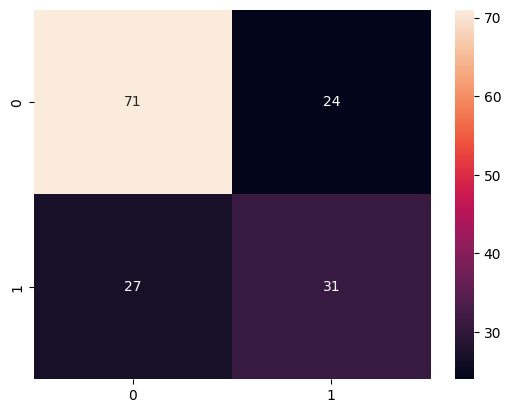

In [26]:
def plot_confusion_matrix(y_test: pd.core.series.Series, y_preds: pd.core.series.Series):
    conf_matrix = confusion_matrix(y_test,y_preds)
    return sns.heatmap(conf_matrix, annot=True)

plot_confusion_matrix(y_test, y_preds)

In [27]:
def best_accuracy(x_train: pd.core.frame.DataFrame,
                  y_train: pd.core.series.Series,
                  x_test: pd.core.frame.DataFrame,
                  y_test: pd.core.series.Series) -> Tuple[int, float]:
    best_k = 0
    best_pred_accuracy = 0.0
    for i in range(10):
        y_preds = predict(x_train, y_train, x_test, i*2+1)
        pred_accuracy = accuracy(y_test, y_preds)
        if (best_pred_accuracy < pred_accuracy):
            best_k = i*2+1
            best_pred_accuracy = pred_accuracy
    
    return best_k, round(best_pred_accuracy, 2)

best_accuracy(x_train, y_train, x_test, y_test)

(9, 75.16)